## About fetch_20newsgroups:
It consists of approximately 20,000 newsgroup documents, partitioned across 20 different newsgroups. Each document belongs to one of these newsgroups, covering a wide range of topics such as politics, sports, religion, technology, and more.


In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn import datasets
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import string

In [2]:
newsgroup = datasets.fetch_20newsgroups()

In [3]:
# Collecting all stopwords that we will be not using
stopword = set(stopwords.words('english'))
print(sorted(stopword))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn't", 'so', 'some',

In [4]:
# Collecting all punctuations that we will be not using
punctuation = set(list(string.punctuation))
print(list(punctuation))

['{', '&', '?', '"', ',', '~', '!', '/', '|', '\\', '^', ':', '<', '=', '`', '[', ')', '#', '%', "'", ';', '.', '}', '>', '+', '@', '_', '-', '*', ']', '$', '(']


In [5]:
# Gathering all stops words and punctuation
stopword.update(punctuation)

In [6]:
# Finding number of words and what are the words
print(f"Number of words is {len(stopword)} \n")

Number of words is 211 



### But The above number of stop words is not enough so we surfed internet to find more of these words

In [7]:
# Getting more stop words and updating it
stops = open("stopwords-en.txt",encoding="utf-8").read()
stops = stops.split()
stopword.update(stops)
print(f"Number of words is {len(stopword)} \n")

Number of words is 1336 



## Now as we have a good number of Stop words we can proceed Further

In [8]:
# Seeing how dataset looks like
newsgroup.data[:1]

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"]

## Getting total number of articles

In [9]:
# Finding out total number of articles
print(f"The total number of articles are {len(newsgroup.data)}")

The total number of articles are 11314


In [10]:
articles = newsgroup.data

## Now splitting Each word by help of word_tokenize()

In [11]:
words = [word_tokenize(article) for article in articles]

In [12]:
print(words[:1])

[['From', ':', 'lerxst', '@', 'wam.umd.edu', '(', 'where', "'s", 'my', 'thing', ')', 'Subject', ':', 'WHAT', 'car', 'is', 'this', '!', '?', 'Nntp-Posting-Host', ':', 'rac3.wam.umd.edu', 'Organization', ':', 'University', 'of', 'Maryland', ',', 'College', 'Park', 'Lines', ':', '15', 'I', 'was', 'wondering', 'if', 'anyone', 'out', 'there', 'could', 'enlighten', 'me', 'on', 'this', 'car', 'I', 'saw', 'the', 'other', 'day', '.', 'It', 'was', 'a', '2-door', 'sports', 'car', ',', 'looked', 'to', 'be', 'from', 'the', 'late', '60s/', 'early', '70s', '.', 'It', 'was', 'called', 'a', 'Bricklin', '.', 'The', 'doors', 'were', 'really', 'small', '.', 'In', 'addition', ',', 'the', 'front', 'bumper', 'was', 'separate', 'from', 'the', 'rest', 'of', 'the', 'body', '.', 'This', 'is', 'all', 'I', 'know', '.', 'If', 'anyone', 'can', 'tellme', 'a', 'model', 'name', ',', 'engine', 'specs', ',', 'years', 'of', 'production', ',', 'where', 'this', 'car', 'is', 'made', ',', 'history', ',', 'or', 'whatever', 'in

## Now performing train test split

In [13]:
X = words
Y = newsgroup.target

In [14]:
#splitting these documents in train and test data.
x_train, x_test, y_train, y_test=train_test_split(words, Y, random_state=42)

## Creating a vocabulary dictionary to store all important words as well as their frequency

In [15]:
vocabulary = {}

In [16]:
for doc in x_train:
    for word in doc:
        if (word.lower() not in stopword) and len(word)>2 and word[0] not in string.punctuation and word[0]!="n't":
            vocabulary[word] = vocabulary.get(word, 0) + 1

## Displaying the graph as per vocabulary

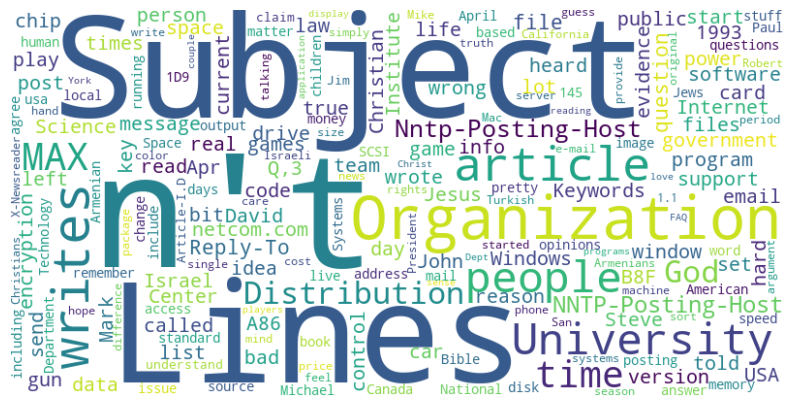

In [17]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(vocabulary)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Now only keeping the important data

In [18]:
def preprocess_data(documents, stopwords):
    processed_docs = []
    for doc in documents:
        processed_doc = [word.lower() for word in doc if (word.lower() in vocabulary)]
        processed_docs.append(' '.join(processed_doc))
    return processed_docs

In [19]:
x_train_processed = preprocess_data(x_train, stopword)
x_test_processed = preprocess_data(x_test, stopword)

## Regenerating the vocabulary based on the updated data

In [20]:
new_vocabulary = {}
for doc in x_train_processed:
    for word in doc.split():
        new_vocabulary[word] = new_vocabulary.get(word, 0) + 1
print(len(new_vocabulary))

70515


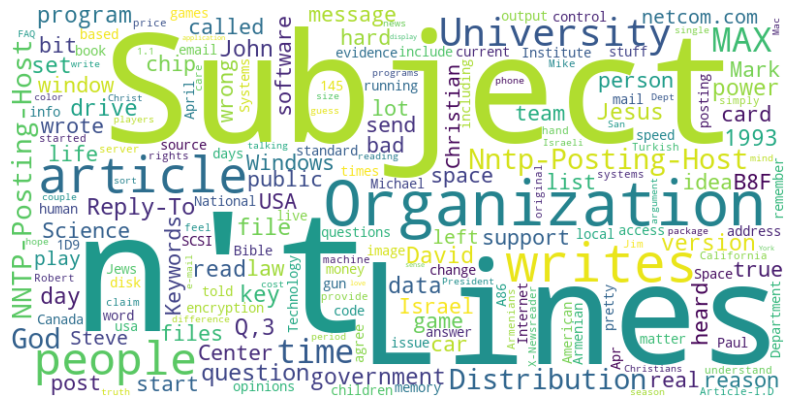

In [21]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(vocabulary)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Creating feature vector

In [22]:
vectorizer = CountVectorizer(vocabulary=new_vocabulary.keys())
X_train_vec = vectorizer.fit_transform(x_train_processed)
X_test_vec = vectorizer.transform(x_test_processed)

## Calling the MultinomialNB

In [23]:
classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)

# Evaluate the classifier
predictions = classifier.predict(X_test_vec)
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8847649346058678


## Testing with random sentence

In [24]:
# Function to predict category for a given sentence
def predict_category(sentence, vectorizer, classifier):
    # Preprocess the input sentence
    preprocessed_sentence = preprocess_data([word_tokenize(sentence)], stopword)[0]

    # Transform the preprocessed sentence into a feature vector
    sentence_vector = vectorizer.transform([preprocessed_sentence])

    # Use the trained classifier to predict the category
    predicted_category = classifier.predict(sentence_vector)

    # Return the predicted category
    return predicted_category[0]

In [25]:
sentence = "I am interested in computer science and machine learning."
predicted_category = predict_category(sentence, vectorizer, classifier)
print(sentence)
print("Predicted category:", newsgroup.target_names[predicted_category])

I am interested in computer science and machine learning.
Predicted category: sci.med


In [26]:
sentence = "jesus christ was a christian."
predicted_category = predict_category(sentence, vectorizer, classifier)
print(sentence)
print("Predicted category:", newsgroup.target_names[predicted_category])

jesus christ was a christian.
Predicted category: soc.religion.christian
